# Análisis Exploratorio de Datos
## Fundamentos del Análisis: Una Mirada Inicial a los Datos

El Análisis Exploratorio de Datos (EDA) constituye una etapa fundamental en toda investigación estadística, ya que permite comprender las características principales del conjunto de datos, identificar patrones, detectar posibles inconsistencias y orientar la preparación de la información antes del modelado.

En este estudio, el EDA tiene como propósito examinar los registros de suicidios en Colombia durante el periodo 2015–2023, con el fin de describir las variables sociodemográficas y contextuales asociadas y evaluar la calidad de los datos para la construcción de un modelo de regresión logística binaria.

En primer lugar, se realiza una revisión general del dataset, verificando el número de observaciones, la disponibilidad de variables y la presencia de valores faltantes o categorías indeterminadas. Posteriormente, se lleva a cabo un análisis univariado, en el que se describen la distribución de la variable dependiente (mecanismo de suicidio: generadores de asfixia vs otros) y de las principales variables independientes (sexo, edad, estado civil, escolaridad, escenario, zona, entre otras).

En una segunda fase, se desarrolla un análisis bivariado, explorando las asociaciones preliminares entre el mecanismo de suicidio y las variables sociodemográficas/contextuales. Esto incluye el uso de tablas de contingencia, gráficos comparativos y estimaciones de razones de momios (odds ratios) crudas en variables binarias.

Finalmente, a partir de los hallazgos del EDA, se definen las decisiones de recodificación, agrupación y preparación de variables que alimentarán el modelo de regresión logística, asegurando la validez y consistencia de los resultados.

##  Desarrollo del Análisis Exploratorio de Datos

- 1. *Carga y dimensiones del DataFrame*

In [42]:
# 1. Carga, limpieza básica y Contar el número de filas y columnas en el DataFrame
import pandas as pd
url = "https://raw.githubusercontent.com/jthowinsson/Suicidio_Colombia/main/Presuntos_Suicidios_con_Coor.csv"
df = pd.read_csv(url, encoding="utf-8")  # separador coma
print(df.shape)


(23544, 42)


- 2. *Información general del DataFrame*

In [ ]:
# 2. Información general del dataset
print("\n--- Información general ---")
print(df.info())

- 3. *Visualizar las primeras filas del DataFrame*

In [ ]:
# 3. Vista preliminar de los datos (head)
import pandas as pd

print("--- Primeras filas ---")
print(df.head())

# Configurar pandas para mostrar todas las columnas y todo el ancho
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

--- Primeras filas ---
   ID  Año del hecho Grupo de edad de la victima  \
0   1           2015                   (18 a 19)   
1   2           2015                   (25 a 29)   
2   3           2015                   (35 a 39)   
3   4           2015                   (55 a 59)   
4   5           2015                   (45 a 49)   

       Grupo Mayor Menor de Edad Edad judicial         Ciclo Vital  \
0  b) Mayores de Edad (>18 años)     (18 a 19)  (18 a 28) Juventud   
1  b) Mayores de Edad (>18 años)     (25 a 28)  (18 a 28) Juventud   
2  b) Mayores de Edad (>18 años)     (35 a 39)   (29 a 59) Adultez   
3  b) Mayores de Edad (>18 años)     (55 a 59)   (29 a 59) Adultez   
4  b) Mayores de Edad (>18 años)     (45 a 49)   (29 a 59) Adultez   

  Sexo de la victima Estado Civil País de Nacimiento de la Víctima  \
0              Mujer   Soltero(a)                         Colombia   
1             Hombre   Soltero(a)                         Colombia   
2             Hombre  Unión libre

- 4. *Resumen de tipos de variables y valores faltantes*

In [ ]:
# 4. Resumen de tipos de variables
import pandas as pd

# === 1) Cargar datos desde GitHub ===
#url = "https://raw.githubusercontent.com/jthowinsson/Suicidio_Colombia/main/Presuntos_Suicidios_con_Coor.csv"
#df = pd.read_csv(url, encoding="utf-8")  # separador coma

# === 2) Tabla 1: Dimensiones ===
dimensiones = pd.DataFrame({
    "Registros": [df.shape[0]],
    "Variables": [df.shape[1]]
})

# === 3) Conteo por tipo de variable (más robusto) ===
n_numeric   = df.select_dtypes(include=["number"]).shape[1]
n_categ     = df.select_dtypes(include=["object", "category"]).shape[1]
n_logical   = df.select_dtypes(include=["bool"]).shape[1]
n_datetime  = df.select_dtypes(include=["datetime64"]).shape[1]  # ✅ Cambio aquí

tipos_tbl = pd.DataFrame({
    "Tipo de variable": ["Numéricas", "Categóricas", "Lógicas", "Fecha / Fecha-hora"],
    "Conteo": [n_numeric, n_categ, n_logical, n_datetime]
})
tipos_tbl["% sobre total"] = (100 * tipos_tbl["Conteo"] / df.shape[1]).round(1)

# === 4) Mostrar tablas ===
print("Dimensiones del dataset:")
display(dimensiones)

print("\nVariables por tipo:")
display(tipos_tbl)

# === 5) Opcional: visualización estilizada en Jupyter ===
tipos_styled = (tipos_tbl.style
    .format({"% sobre total": "{:.1f}"})
    .set_properties(subset=["Conteo", "% sobre total"], **{"text-align": "right"})
    .background_gradient(subset=["% sobre total"], cmap="Blues")
)

display(tipos_styled)

print("\nNota: las variables 'Categóricas' incluyen object/category; " \
"'Fecha' incluye datetime64 (con o sin zona horaria).")


Dimensiones del dataset:


,Registros,Variables
0,23544,42



Variables por tipo:


,Tipo de variable,Conteo,% sobre total
0,Numéricas,9,21.4
1,Categóricas,33,78.6
2,Lógicas,0,0.0
3,Fecha / Fecha-hora,0,0.0


,Tipo de variable,Conteo,% sobre total
0,Numéricas,9,21.4
1,Categóricas,33,78.6
2,Lógicas,0,0.0
3,Fecha / Fecha-hora,0,0.0



Nota: las variables 'Categóricas' incluyen object/category; 'Fecha' incluye datetime64 (con o sin zona horaria).


- 5. *Número de valores únicos por columna categórica*

In [ ]:
# 5. Resumir las columnas utilizando describe()para obtener la distribución de las variables,
df.select_dtypes(['object','category']).nunique()  # Número de valores únicos por columna categórica

Grupo de edad de la victima              17
Grupo Mayor Menor de Edad                 2
Edad judicial                            17
Ciclo Vital                               6
Sexo de la victima                        2
Estado Civil                              7
País de Nacimiento de la Víctima         34
Escolaridad                              12
Pertenencia Grupal                       27
Mes del hecho                            13
Dia del hecho                             8
Rango de Hora del Hecho X 3 Horas        10
Municipio del hecho DANE                978
Departamento del hecho DANE              34
Escenario del Hecho                      51
Zona del Hecho                            4
Actividad Durante el Hecho               17
Circunstancia del Hecho                   1
Manera de Muerte                          1
Mecanismo Causal                         14
Diagnostico Topográfico de la Lesión     12
Presunto Agresor                          1
Condición de la Víctima         

- 6. *Conteo de valores únicos por columna categórica*

In [ ]:
# 6.  Para las variables categóricas, necesitamos utilizar el parámetro include=object
print(df.describe(include=object))

       Grupo de edad de la victima      Grupo Mayor Menor de Edad  \
count                        23544                          23544   
unique                          17                              2   
top                      (20 a 24)  b) Mayores de Edad (>18 años)   
freq                          3413                          21041   

       Edad judicial        Ciclo Vital Sexo de la victima Estado Civil  \
count          23544              23544              23544        23544   
unique            17                  6                  2            7   
top        (20 a 24)  (29 a 59) Adultez             Hombre   Soltero(a)   
freq            3413              10258              18928        11115   

       País de Nacimiento de la Víctima                Escolaridad  \
count                             23544                      23544   
unique                               34                         12   
top                            Colombia  Educación básica primaria  

- 7. *Valores nulos por columna*: 
Número de valores nulos por columna

In [ ]:
# 7. Valores nulos por columna
print("\n--- Valores nulos ---")
print(df.isnull().sum())


--- Valores nulos ---
ID                                      0
Año del hecho                           0
Grupo de edad de la victima             0
Grupo Mayor Menor de Edad               0
Edad judicial                           0
Ciclo Vital                             0
Sexo de la victima                      0
Estado Civil                            0
País de Nacimiento de la Víctima        0
Escolaridad                             0
Pertenencia Grupal                      0
Mes del hecho                           0
Dia del hecho                           0
Rango de Hora del Hecho X 3 Horas       0
Código Dane Municipio                   0
Municipio del hecho DANE                0
Departamento del hecho DANE             0
Código Dane Departamento                0
Escenario del Hecho                     0
Zona del Hecho                          0
Actividad Durante el Hecho              0
Circunstancia del Hecho                 0
Manera de Muerte                        0
Mecanismo C

- 8. *Valores Faltantes*: 
Número total de valores faltantes en el DataFrame no tiene valores faltantes

In [ ]:
# 8 Valores Faltantes
valores_faltantes = df.isnull().sum()

- 9. *Mecanismos Causales*:
Conteo de frecuencias de mecanismos causales variable para análisis posterior como variable dependinete en el modelo

In [ ]:
# 9. Contar frecuencias de mecanismos
import pandas as pd
conteo_mecanismos = df["Mecanismo Causal"].value_counts()

print(conteo_mecanismos)

Mecanismo Causal
Generadores de asfixia          15410
Tóxico                           3829
Proyectil de arma de fuego       2345
Contundente                      1405
Corto punzante                    255
Cortante                          135
Térmico                            80
Por determinar                     35
Caústico                           19
Corto contundente                  15
Agente o mecanismo explosivo        8
Punzante                            5
Eléctrico                           2
Mecanismo o agente explosivo        1
Name: count, dtype: int64


- 10. *Distribución por sexo*:
Distribución de suicidios por sexo

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Detecta la columna de sexo
col_sexo = next((c for c in df.columns if 'sexo' in c.lower()), None)
if col_sexo is None:
    raise ValueError("No encuentro una columna que contenga 'sexo' en su nombre.")

# Tabla n y %
serie = (df[col_sexo].astype(str).str.strip().str.title()
         .replace({'Nan':'Desconocido'}))
vc = serie.value_counts(dropna=False)
pct = (vc / vc.sum() * 100).round(1)
tabla = pd.DataFrame({'Frecuencia Absoluta': vc, 'Frecuencia Porcentual %': pct})
from IPython.display import display
display(tabla)

# Gráfico
#fig, ax = plt.subplots()
#ax.bar(vc.index, vc.values)
#ax.set_title("Distribución por sexo")
#ax.set_ylabel("Número de casos")
#for i, v in enumerate(vc.values):
    #ax.text(i, v, f"{v}\n{pct.iloc[i]}%", ha='center', va='bottom', fontsize=9)
#plt.show()


,Frecuencia Absoluta,Frecuencia Porcentual %
Sexo de la victima,,
Hombre,18928,80.4
Mujer,4616,19.6


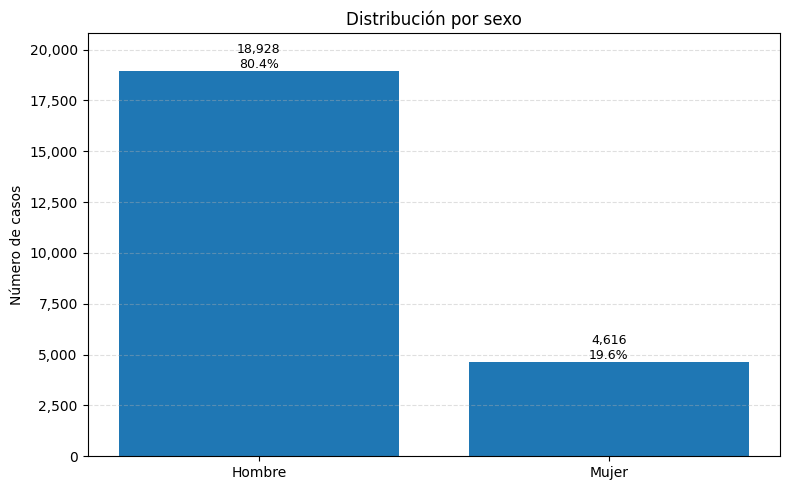

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Serie limpia
col_sexo = next((c for c in df.columns if 'sexo' in c.lower()))
s = (df[col_sexo].astype(str).str.strip().str.title()
     .replace({'Nan':'Desconocido'}))
vc = s.value_counts(dropna=False)
pct = (vc / vc.sum() * 100).round(1)

# Ordena por frecuencia
vc = vc.sort_values(ascending=False)
pct = pct[vc.index]

# Gráfico
fig, ax = plt.subplots(figsize=(8,5))
bars = ax.bar(vc.index, vc.values)
ax.set_title("Distribución por sexo")
ax.set_ylabel("Número de casos")
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.yaxis.grid(True, linestyle='--', alpha=0.4)
plt.xticks(rotation=0)

# Anota n y %
for rect, n, p in zip(bars, vc.values, pct.values):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(),
            f"{int(n):,}\n{p:.1f}%", ha='center', va='bottom', fontsize=9)

ax.margins(y=0.1)
plt.tight_layout()
plt.show()


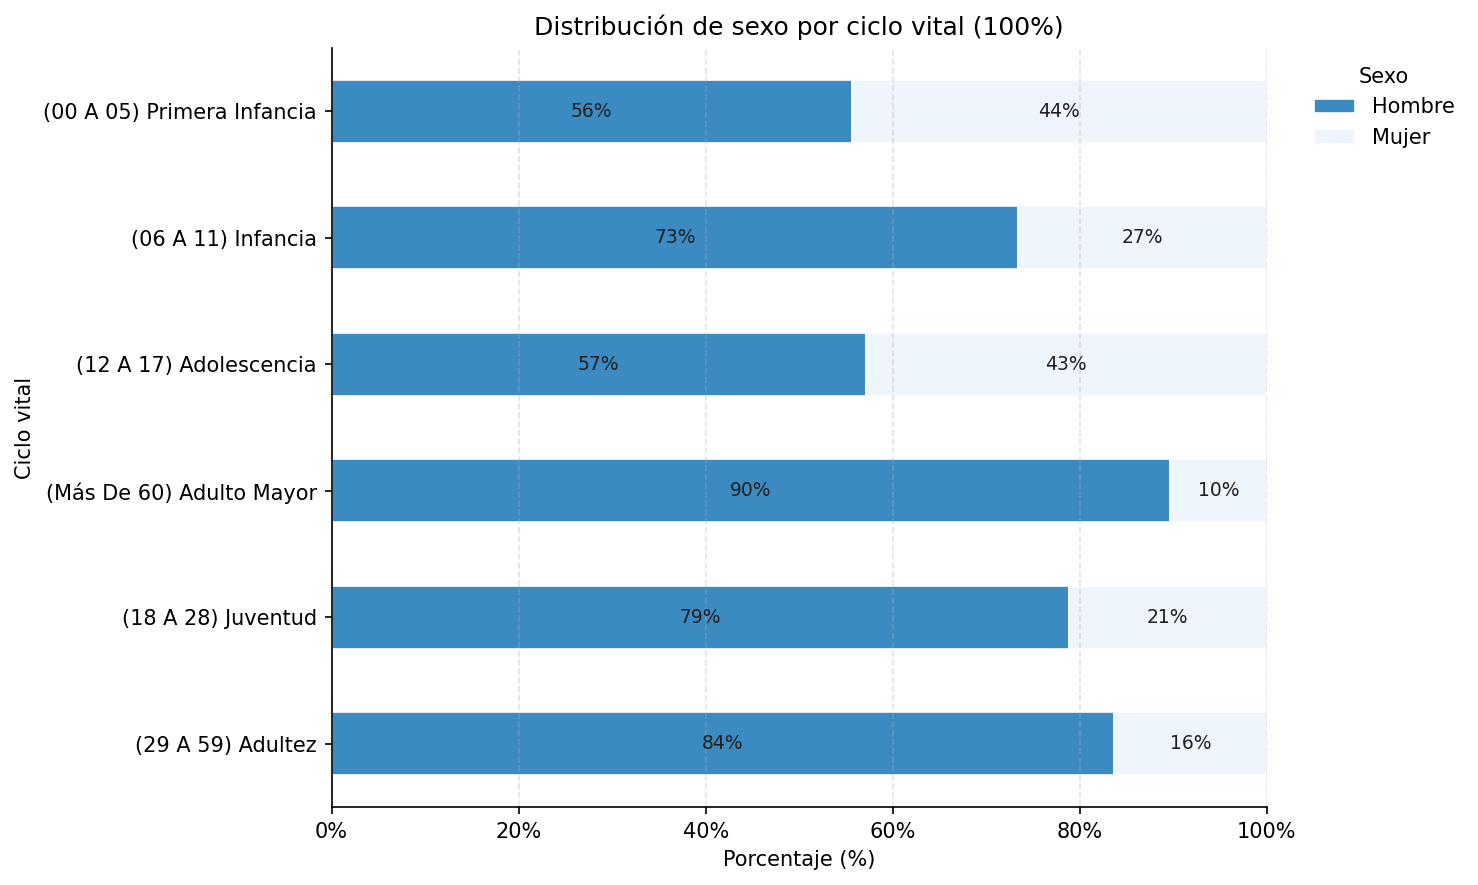

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, PercentFormatter

# === Construir rowpct (100% por ciclo vital) ===
col_sexo  = next(c for c in df.columns if 'sexo' in c.lower())
col_ciclo = next(c for c in df.columns if 'ciclo' in c.lower())

sexo  = df[col_sexo].astype(str).str.strip().str.title().replace({'Nan':'Desconocido'})
ciclo = df[col_ciclo].astype(str).str.strip().str.title().replace({'Nan':'Desconocido'})

tab = pd.crosstab(ciclo, sexo)                                  # conteos
rowpct = (tab.div(tab.sum(1), axis=0) * 100).round(1)           # % por fila
rowpct = rowpct.loc[tab.sum(1).sort_values(ascending=False).index]  # ordenar por n

# === Gráfica monocrómica ===
fig, ax = plt.subplots(figsize=(10,6), dpi=150)
cats = rowpct.columns.tolist()
cmap = plt.cm.Blues_r
colors = [cmap(0.35 + 0.6*i/max(1, len(cats)-1)) for i in range(len(cats))]

rowpct.plot(kind='barh', stacked=True, ax=ax, color=colors, edgecolor='white', linewidth=0.8)

ax.set_xlim(0, 100)
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_major_formatter(PercentFormatter(100, decimals=0))
ax.grid(axis='x', linestyle='--', alpha=0.35)
ax.set_xlabel('Porcentaje (%)'); ax.set_ylabel('Ciclo vital')
ax.set_title('Distribución de sexo por ciclo vital (100%)')
for s in ['top','right']: ax.spines[s].set_visible(False)
ax.legend(title='Sexo', bbox_to_anchor=(1.03,1), loc='upper left', frameon=False)

for i, (_, row) in enumerate(rowpct.iterrows()):
    cum = 0
    for val in row:
        if val >= 3:
            ax.text(cum + val/2, i, f'{val:.0f}%', ha='center', va='center', fontsize=9, color='#1f1f1f')
        cum += val

plt.tight_layout(); plt.show()


Matriz de confusión:
[[ 232 2208]
 [ 188 4436]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.55      0.10      0.16      2440
           1       0.67      0.96      0.79      4624

    accuracy                           0.66      7064
   macro avg       0.61      0.53      0.47      7064
weighted avg       0.63      0.66      0.57      7064

AUC: 0.6080241097765047


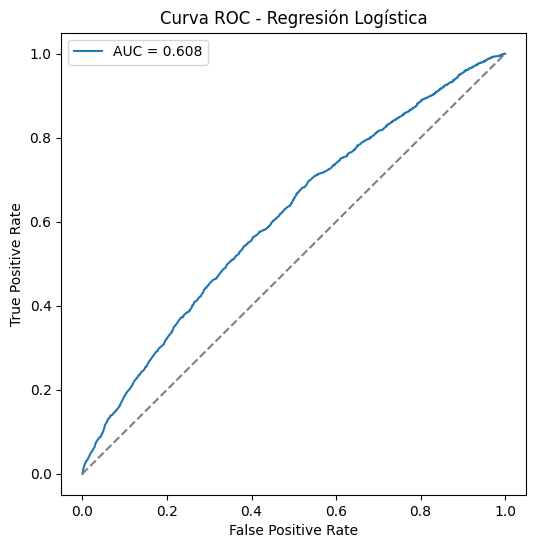

                                             Variable  Coeficiente        OR
17                             Estado Civil_No aplica     1.832006  6.246404
1                             Edad judicial_(10 a 13)     1.000773  2.720385
23              Escolaridad_Educación básica primaria     0.571314  1.770593
31                        Escolaridad_Sin escolaridad     0.533915  1.705597
32                        Escolaridad_Sin información     0.514179  1.672265
24  Escolaridad_Educación básica secundaria o secu...     0.473929  1.606293
25  Escolaridad_Educación inicial y educación pree...     0.417104  1.517561
26      Escolaridad_Educación media o secundaria alta     0.395206  1.484689
2                             Edad judicial_(14 a 17)     0.326783  1.386500
19                       Estado Civil_Sin información     0.283920  1.328327
21                           Estado Civil_Unión libre     0.224748  1.252008
20                            Estado Civil_Soltero(a)     0.164567  1.178883

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# 1. Cargar datos
# --------------------------
# url = url = 'https://github.com/jthowinsson/Suicidio_Colombia/raw/main/Presuntos_Suicidios._Colombia%2C_2015_a_2023.xlsx'
# df = pd.read_excel(url, sheet_name="Data")

# --------------------------
# 2. Recodificar variable dependiente
# --------------------------
df["mecanismo_binario"] = df["Mecanismo Causal"].apply(
    lambda x: 1 if str(x).strip().lower() == "generadores de asfixia" else 0
)

# --------------------------
# 3. Selección de variables predictoras
# (ajusta según tus columnas disponibles)
# --------------------------
X = df[["Sexo de la victima", "Edad judicial", "Estado Civil", "Escolaridad", "Zona del Hecho"]].copy()
y = df["mecanismo_binario"]

# Transformar categóricas en dummies
X = pd.get_dummies(X, drop_first=True)

# --------------------------
# 4. Dividir train/test
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --------------------------
# 5. Ajustar modelo logístico
# --------------------------
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)

# --------------------------
# 6. Evaluación
# --------------------------
y_pred = logit.predict(X_test)
y_prob = logit.predict_proba(X_test)[:,1]

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)

# --------------------------
# 7. Curva ROC
# --------------------------
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Regresión Logística")
plt.legend()
plt.show()

# --------------------------
# 8. Coeficientes → Odds Ratios
# --------------------------
odds_ratios = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": logit.coef_[0],
    "OR": np.exp(logit.coef_[0])
})
print(odds_ratios.sort_values(by="OR", ascending=False))


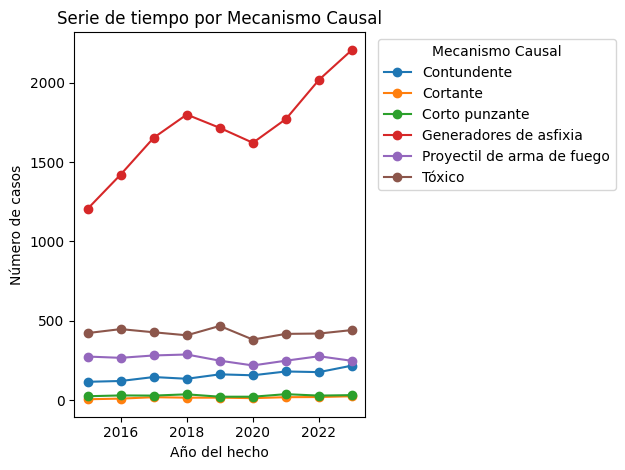

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# url = "https://raw.githubusercontent.com/jthowinsson/Suicidio_Colombia/main/Presuntos_Suicidios_con_Coor.csv"

# Carga y limpieza básica
df = pd.read_csv(url, encoding="utf-8")
df = df[['Año del hecho','Mecanismo Causal']].dropna()
df['Año del hecho'] = pd.to_numeric(df['Año del hecho'], errors='coerce')
df = df.dropna(subset=['Año del hecho']).astype({'Año del hecho': int})

# Agregación
ct = (df.groupby(['Año del hecho','Mecanismo Causal'])
        .size().reset_index(name='casos'))

# Opcional: limitar a los 6 mecanismos más frecuentes para no saturar la gráfica
top_mec = (ct.groupby('Mecanismo Causal')['casos'].sum()
             .nlargest(6).index)
ct = ct[ct['Mecanismo Causal'].isin(top_mec)]

# Pivot y gráfico
pvt = (ct.pivot(index='Año del hecho',
                columns='Mecanismo Causal',
                values='casos')
         .fillna(0).sort_index())

ax = pvt.plot(marker='o')
ax.set_xlabel('Año del hecho')
ax.set_ylabel('Número de casos')
ax.set_title('Serie de tiempo por Mecanismo Causal')
ax.legend(title='Mecanismo Causal', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


Columnas disponibles: ['id', 'ano_del_hecho', 'grupo_de_edad_de_la_victima', 'grupo_mayor_menor_de_edad', 'edad', 'ciclo_vital', 'sexo', 'estado_civil', 'pais_de_nacimiento_de_la_victima', 'escolaridad', 'pertenencia_grupal', 'mes_del_hecho', 'dia_del_hecho', 'rango_de_hora_del_hecho_x_3_horas', 'codigo_dane_municipio', 'municipio_del_hecho_dane', 'departamento_del_hecho_dane', 'codigo_dane_departamento', 'escenario_del_hecho', 'zona_del_hecho', 'actividad_durante_el_hecho', 'circunstancia_del_hecho', 'manera_de_muerte', 'mecanismo_causal', 'diagnostico_topografico_de_la_lesion', 'presunto_agresor', 'condicion_de_la_victima', 'medio_de_desplazamiento_o_transporte', 'servicio_del_vehiculo', 'clase_o_tipo_de_accidente', 'objeto_de_colision', 'servicio_del_objeto_de_colision', 'razon_del_suicidio', 'localidad_del_hecho', 'ancestro_racial', 'codigo_dane_municipio_norm', 'muni_cod', 'muni_nom', 'depto_cod', 'depto_nom', 'latitud', 'longitud']

Posibles columnas de sexo: ['sexo']
Posibles co

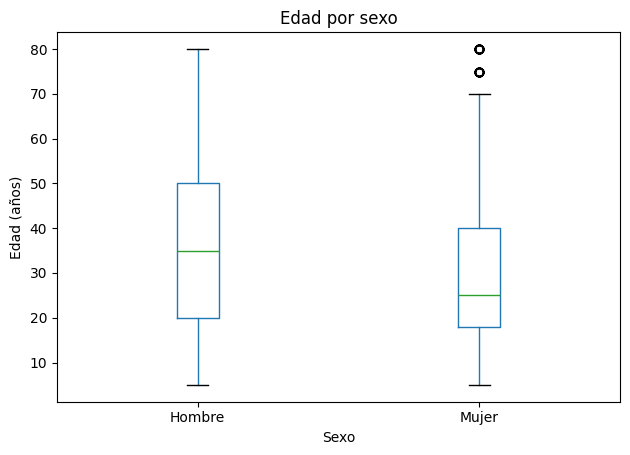

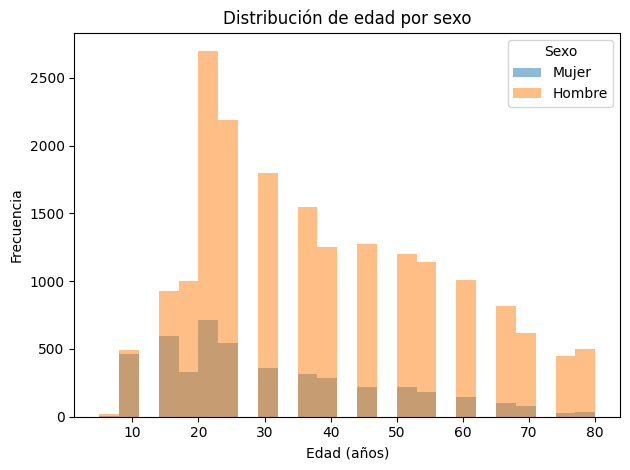

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata

url = "https://raw.githubusercontent.com/jthowinsson/Suicidio_Colombia/main/Presuntos_Suicidios_con_Coor.csv"

# ---- Carga robusta ----
try:
    df = pd.read_csv(url, encoding="utf-8", sep=",")
except UnicodeDecodeError:
    df = pd.read_csv(url, encoding="latin1", sep=",")

# ---- Normalizar nombres de columnas (minúsculas, sin tildes/espacios) ----
def norm(s):
    s = str(s).strip().lower()
    s = ''.join(c for c in unicodedata.normalize('NFKD', s) if not unicodedata.combining(c))
    s = s.replace("  "," ").replace(" ", "_")
    return s

df.columns = [norm(c) for c in df.columns]

# Intentar mapear posibles nombres
mapa = {
    'sexo_de_la_victima': 'sexo',
    'sexo_de_la_víctima': 'sexo',
    'sexo': 'sexo',
    'edad_judicial': 'edad',
    'edad': 'edad',
}
for k,v in list(mapa.items()):
    if k in df.columns:
        df.rename(columns={k:v}, inplace=True)

# ---- Selección y limpieza ----
# Primero verificar las columnas disponibles
print("Columnas disponibles:", df.columns.tolist())

# Verificar si tenemos las columnas necesarias o sus posibles variantes
sexo_cols = [col for col in df.columns if 'sexo' in col.lower()]
edad_cols = [col for col in df.columns if 'edad' in col.lower()]

print("\nPosibles columnas de sexo:", sexo_cols)
print("Posibles columnas de edad:", edad_cols)

if not sexo_cols or not edad_cols:
    raise ValueError("No se encontraron columnas de sexo o edad")

# Seleccionar las columnas apropiadas
sexo_col = sexo_cols[0]  # usar la primera columna que contenga 'sexo'
edad_col = 'edad_judicial' if 'edad_judicial' in df.columns else edad_cols[0]

# Crear DataFrame base
base = df[[sexo_col, edad_col]].copy()
base.columns = ['sexo', 'edad']  # renombrar columnas

# Limpiar y convertir edad
# Si edad es una categoría como '(18 a 19)', extraer el primer número
base['edad'] = base['edad'].astype(str).str.extract('(\d+)').astype(float)

# Filtrar edades plausibles y datos faltantes
base = base.dropna(subset=['sexo', 'edad'])
base = base[(base['edad']>=0) & (base['edad']<=120)]

# Verificar que tenemos datos
if base.empty:
    raise ValueError("No quedaron datos después de la limpieza. Verifica los datos originales")

print(f"\nDatos después de la limpieza: {len(base)} filas")
print("\nDistribución de sexo:")
print(base['sexo'].value_counts())
print("\nEstadísticas de edad:")
print(base['edad'].describe())

# --- Add this section ---
if base.empty:
    print("DataFrame 'base' is empty after cleaning.")
    print("Check for missing or invalid data in 'sexo' and 'edad' columns.")
    print(df[['sexo', 'edad']].head())  # Display the first few rows before cleaning
    raise ValueError("No data available after cleaning. Check the data.")

if base['sexo'].nunique() == 0:
    print("No unique values in 'sexo' column after cleaning.")
    print("Check the values in the 'sexo' column.")
    print(base['sexo'].value_counts(dropna=False))  # Show value counts including NaN
    raise ValueError("No unique values in 'sexo' column after cleaning.")
# --- End of added section ---
    print("No unique values in 'sexo' column after cleaning.")
    print("Check the values in the 'sexo' column.")
    print(base['sexo'].value_counts(dropna=False))  # Show value counts including NaN
    raise ValueError("No unique values in 'sexo' column after cleaning.")
# --- End of added section ---

# ==============================
# 1) Boxplot edad por sexo
# ==============================
ax = base.boxplot(column='edad', by='sexo', grid=False)
ax.set_title('Edad por sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('Edad (años)')
plt.suptitle('')
plt.tight_layout()
plt.show()

# ==============================
# 2) Histogramas comparados de edad por sexo
# ==============================
plt.figure()
for s in base['sexo'].dropna().unique():
    base.loc[base['sexo']==s, 'edad'].plot(kind='hist', bins=25, alpha=0.5, label=str(s))
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')
plt.title('Distribución de edad por sexo')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()
